<a href="https://colab.research.google.com/github/Neha609/Machine-Learning-Projects/blob/gh-pages/Movielens_Dataset_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Movielens Dataset Analysis**

You don't need to limit yourself to the number of rows/cells provided. You can add additional rows in each section to add more lines of code.

**Happy coding!**

# Data Acquisition of Movielens dataset

In [ ]:
#import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
# Uncomment below line to see the style availables
#plt.style.available

In [ ]:
#Load user dataSet as Numpy Array
Users_data = np.fromfile('users.dat',dtype=float)

In [ ]:
#Load Rating DataSet as Numpy Array
Ratings_data = np.fromfile('ratings.dat',dtype=float)

In [ ]:
#Load Movies DataSet as Numpy Array
Movies_data = np.fromfile('movies.dat',dtype=float)

In [ ]:
#Check the Shape of User data
Users_data.shape

(16796,)

In [ ]:
#Check the Shape of Rating Data
Ratings_data.shape

(3074266,)

In [ ]:
#Check the Shape of Movies Data
Movies_data.shape

(21413,)

In [ ]:
#Load users data in DataFrame
UsersColumn = ['UserId','Gender','Age','Occupation','Zip-Code']
Users_df = pd.read_table("users.dat",sep="::",header=None, engine='python', names=UsersColumn)

In [ ]:
#Load Ratings data in DataFrame
RatingsColumns = ['UserId','MovieId','Rating','Timestamp']
Ratings_df = pd.read_table("ratings.dat",sep="::",header=None, engine='python', names=RatingsColumns)

In [ ]:
#Load the Movies data in DataFrame
MoviesColumn= ['MovieId','Title','Genres']
Movies_df = pd.read_table("movies.dat",sep="::", engine = 'python',names = MoviesColumn)

In [ ]:
#Visualise the Users Data
Users_df.head()


,UserId,Gender,Age,Occupation,Zip-Code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [ ]:
#Visualise the Ratings Data
Ratings_df.head()

,UserId,MovieId,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [ ]:
#Visualise the Movies Data
Movies_df.head()

,MovieId,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
#View top 10 Users Records
Users_df.head(10)

,UserId,Gender,Age,Occupation,Zip-Code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
5,6,F,50,9,55117
6,7,M,35,1,06810
7,8,M,25,12,11413
8,9,M,25,17,61614
9,10,F,35,1,95370


In [ ]:
#View top 10 Ratings Records
Ratings_df.head(10)

,UserId,MovieId,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
5,1,1197,3,978302268
6,1,1287,5,978302039
7,1,2804,5,978300719
8,1,594,4,978302268
9,1,919,4,978301368


In [ ]:
#View top 10 Movies Records
Movies_df.head(10)

,MovieId,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


# Perform the Exploratory Data Analysis (EDA) for the User Dataset

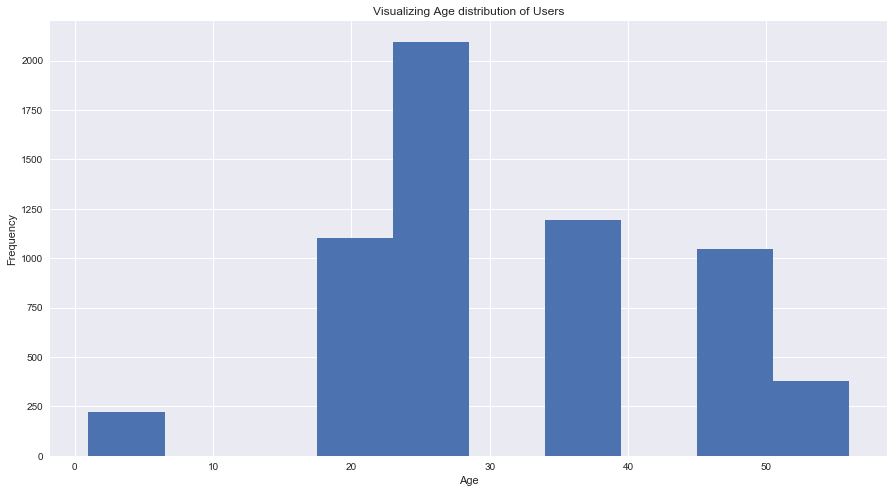

In [ ]:
#Visualize User Age Distribution
plt.figure(figsize=(15,8))
plt.style.use('seaborn')
plt.hist(Users_df.Age)
plt.title('Visualizing Age distribution of Users')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

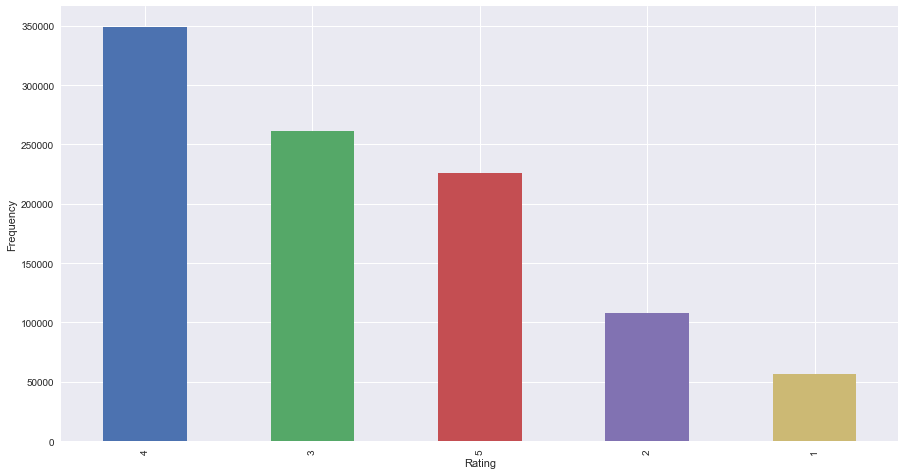

In [ ]:
#Visualize Overall Ratings by Users
plt.figure(figsize=(15,8))
plt.xlabel('Rating')
plt.ylabel('Frequency')
Ratings_df.Rating.value_counts().plot(kind='bar')
#plt.show()

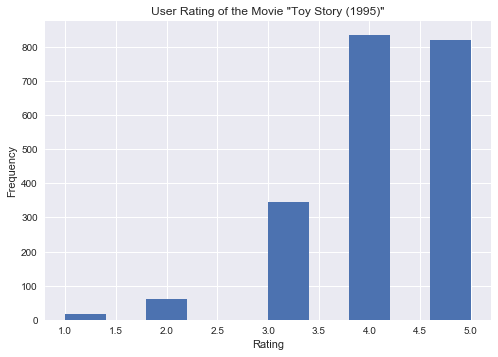

In [ ]:
#Find and visualize the user rating of the movie “Toy Story”
Movie_Rating = Movies_df[Movies_df.Title =='Toy Story (1995)']
MovieID = int(Movie_Rating.MovieId)
ToyStory_Ratings = Ratings_df[Ratings_df.MovieId==MovieID]
plt.style.use('seaborn')
plt.ylabel('Frequency')
plt.xlabel('Rating')
plt.title('User Rating of the Movie "Toy Story (1995)"')
plt.hist(ToyStory_Ratings.Rating)
plt.show()

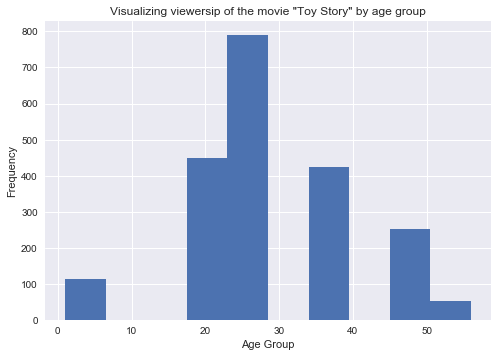

In [ ]:
#Find and visualize the viewership of the movie “Toy Story” by age group
toyStoryList = (ToyStory_Ratings.UserId)
dfToyStoryAge = Users_df[Users_df['UserId'].isin(toyStoryList)]
plt.style.use('seaborn')
plt.ylabel('Frequency')
plt.xlabel('Age Group')
plt.title('Visualizing viewersip of the movie "Toy Story" by age group')
plt.hist(dfToyStoryAge.Age)
plt.show()

In [ ]:
#Finding and visualizing the top 25 movies by viewership rating
dfTop25 = Ratings_df[Ratings_df.Rating == 5]
dfTop25 = dfTop25 [['MovieId','UserId']].groupby('MovieId').count()
dfTop25.rename(columns = {'UserId': 'TOTAL COUNTS'}, inplace = True)

dfTop25 = dfTop25.sort_values('TOTAL COUNTS', ascending = False) [0:25]
dfTop25.reset_index(inplace = True)
top25List = list(dfTop25.MovieId.values)
dfTop25Movies = Movies_df[Movies_df['MovieId'].isin(top25List)]
dfTop25MoviesWithCount = pd.merge(dfTop25Movies, dfTop25, on='MovieId')
dfTop25MoviesWithCount.sort_values('TOTAL COUNTS',ascending = False, inplace =True)
dfTop25MoviesWithCount.set_index('MovieId', inplace=True)
dfTop25MoviesWithCount

,Title,Genres,TOTAL COUNTS
MovieId,,,
2858,American Beauty (1999),Comedy|Drama,1963
260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1826
1198,Raiders of the Lost Ark (1981),Action|Adventure,1500
1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Drama|Sci-Fi|War,1483
527,Schindler's List (1993),Drama|War,1475
858,"Godfather, The (1972)",Action|Crime|Drama,1475
318,"Shawshank Redemption, The (1994)",Drama,1457
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,1430
2028,Saving Private Ryan (1998),Action|Drama|War,1405


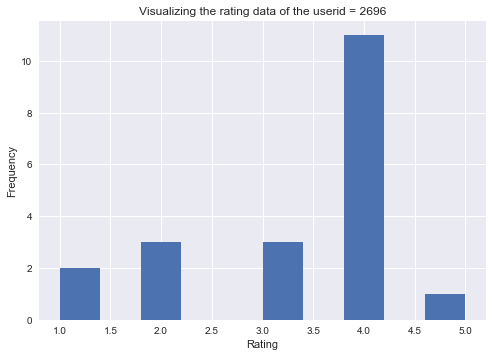

,UserId,MovieId,Rating,Timestamp
440667,2696,1258,4,973308710
440668,2696,1270,2,973308676
440669,2696,1617,4,973308842
440670,2696,1625,4,973308842
440671,2696,1644,2,973308920
440672,2696,1645,4,973308904
440673,2696,1805,4,973308886
440674,2696,1892,4,973308904
440675,2696,800,5,973308842
440676,2696,2338,2,973308920


In [ ]:
# Visualizing the rating data by user of the userid = 2696
UserID = 2696
dfUserIDRatings = Ratings_df[Ratings_df.UserId==UserID]
plt.style.use('seaborn')
plt.ylabel('Frequency')
plt.xlabel('Rating')
plt.title('Visualizing the rating data of the userid = 2696')
plt.hist(dfUserIDRatings.Rating)
plt.show()
dfUserIDRatings

# Performing Machine Learning on first 500 Extracted Records

In [ ]:
# Features (x) = [MOVIEID,AGE,OCCUPATION]
# Label (y) = [RATING]
xTemp = pd.merge(Users_df,Ratings_df,on = 'UserId')[0:500]
xTemp
x = xTemp[['MovieId','Age','Occupation']]
x =x.values
y = np.array(xTemp.Rating)

In [ ]:
# instantiate the classifier
clf = DecisionTreeClassifier()

In [ ]:
# fit the training data
clf.fit(x, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [ ]:
# Expected predicted values are:
# [1193, 1, 10] = 5 "Rating"
# [838, 50, 9] = 4 "Rating"
test_sample = [[1193, 1, 10], [838, 50, 9]]
prediction = clf.predict(test_sample)
print(prediction)

[5 4]


In [ ]:
#Verifiying prediction for: [1193, 1, 10]
xTemp[(xTemp.MovieId == 1193) & (xTemp.Age == 1)]

,UserId,Gender,Age,Occupation,Zip-Code,MovieId,Rating,Timestamp
0,1,F,1,10,48067,1193,5,978300760


In [ ]:
#Verifiying prediction for: [838, 50, 9]
xTemp[(xTemp.MovieId == 838) & (xTemp.Age == 50)]

,UserId,Gender,Age,Occupation,Zip-Code,MovieId,Rating,Timestamp
496,6,F,50,9,55117,838,4,978237444


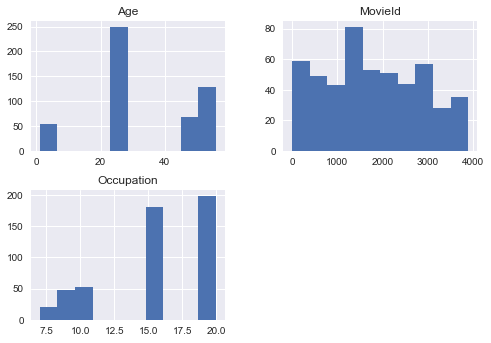

In [ ]:
#Create a Histogram for Movie,Age and Occupation
xTemp.hist(column = ['MovieId','Age','Occupation']);